
# Notebook Intentions

The purpose of this notebook is to simulate an amusement park. 


In [1]:
from park import Park
from behavior_reference import BEHAVIOR_ARCHETYPE_PARAMETERS

### Book Keeping

    - Version: dictates the location performance graphs are stored
    - Verbosity: controls much information is displayed during a simulation, increase to show more info
    - Show Plots: controls whether park plots are displayed in this notebook
    - RNG Seed: seeds random number generators to enforce identical results across runs/machines
    

In [2]:
VERSION = "20K All FP - MIKE"
VERBOSITY = 1
SHOW_PLOTS = True
RNG_SEED = 10


## Park
 
The park contains Agents, Attractions and Activities.

- Total Daily Agents: dictates how many agents visit the park within a day
- Hourly Percent: dictates what percentage of Total Daily Agents visits the park at each hour
- Perfect Arrivals: enforces that the exact amount of Total Daily Agents arrives during the day
- Expedited Pass Ability Percent: percent of agents aware of expeditied passes
- Expedited Threshold: acceptable queue wait time length before searching for an expedited pass
- Expedited Limit: total number of expedited pass an agent can hold at any given time


In [3]:
TOTAL_DAILY_AGENTS = 50000 #38047 actual average
PERFECT_ARRIVALS = True
HOURLY_PERCENT = {
    "10:00 AM": 18,
    "11:00 AM": 23,
    "12:00 PM": 17,
    "1:00 PM": 15,
    "2:00 PM": 9,
    "3:00 PM": 7,
    "4:00 PM": 2,
    "5:00 PM": 5,
    "6:00 PM": 3,
    "7:00 PM": 1,
    "8:00 PM": 0,
    "9:00 PM": 0,
    "10:00 PM": 0
}
EXP_ABILITY_PCT = 0.95
EXP_THRESHOLD = 30
EXP_LIMIT = 1

## Agents

The park is populated by agents. Agents visit attractions and activities. They make decisions about where to go based on their preferences, the popularity of attractions and activities and waiting times. Each Agent has a behavioral archetype.

- Ride Enthusiast: wants to stay for a long time, go on as many attractions as possible, doesn't want to visit activites, doesn't mind waiting
- Ride Favorer: wants to go on a lot of attractions, but will vists activites occasionally, will wait for a while in a queue
- Park Tourer: wants to stay for a long time and wants to see attractions and activities equally, reasonable about wait times
- Park Visitor: doesn't want to stay long and wants to see attractions and activities equally, inpatient about wait times
- Activity Favorer: doesn't want to stay long and prefers activities, reasonable about wait times
- Activity Enthusiast: wants to visit a lot of activities, reasonable about wait times

Archetypes can be tweaked and new archetypes can be added in `behavior_reference.py`. 

- Agent Archetype Distribution: dictates the probability an agent will have a particular behavioral archetype


In [4]:
AGENT_ARCHETYPE_DISTRIBUTION = {
    "ride_enthusiast": 10,
    "ride_favorer": 15,
    "park_tourer": 25,
    "park_visitor": 30,
    "activity_favorer": 15,
    "activity_enthusiast": 5,
}


## Attractions

Attractions are essentially rides within a park. 

- Attractions: list of dictionaries that describe the attractions within the park
    - Name: name of the attraction
    - Run Time: How long the attraction take to run, in minutes
    - Capacity: Maximium number of agents that can be on the attraction during a run
    - Popularity: Value from 1-10 that describes how popular an attraction is with respect to other attractions
    - Expedited Queue: Dictates whether the attraction has an expedited queue or not
    - Expedited Queue Ratio: Dictates what percentage of attraction capacity is devoted to members of the expedited queue
    - Child Eligible: Dictates whether children can ride the attraction
    - Adult Eligible: Dictates whether adults can ride the attraction

In [5]:
ATTRACTIONS = [
    {
        "name": "Alpha",
        "run_time": 10,
        "hourly_throughput": 3000,
        "popularity": 10,
        "expedited_queue": True,
        "expedited_queue_ratio": 0.8,
        "child_eligible": True,
        "adult_eligible": True,
    },
    {
        "name": "Beta",
        "run_time": 5,
        "hourly_throughput": 2400,
        "popularity": 9,
        "expedited_queue": True,
        "expedited_queue_ratio": 0.8,
        "child_eligible": True,
        "adult_eligible": True,
    },
    {
        "name": "Gamma",
        "run_time": 15,
        "hourly_throughput": 2000,
        "popularity": 8,
        "expedited_queue": True,
        "expedited_queue_ratio": 0.8,
        "child_eligible": True,
        "adult_eligible": True,
    },
    {
        "name": "Delta",
        "run_time": 5,
        "hourly_throughput": 1200,
        "popularity": 7,
        "expedited_queue": True,
        "expedited_queue_ratio": 0.8,
        "child_eligible": True,
        "adult_eligible": False,
    },
    {
        "name": "Epsilon",
        "run_time": 10,
        "hourly_throughput": 2000,
        "popularity": 6,
        "expedited_queue": True,
        "expedited_queue_ratio": 0.8,
        "child_eligible": False,
        "adult_eligible": True,
    },
    {
        "name": "Zeta",
        "run_time": 6,
        "hourly_throughput": 2000,
        "popularity": 5,
        "expedited_queue": True,
        "expedited_queue_ratio": 0.8,
        "child_eligible": True,
        "adult_eligible": False,
    },
    {
        "name": "Eta",
        "run_time": 12,
        "hourly_throughput": 2400,
        "popularity": 4,
        "expedited_queue": True,
        "expedited_queue_ratio": 0.8,
        "child_eligible": False,
        "adult_eligible": True,
    }
]

## Activities
Activities are everything to do within the park that isn't an attraction. 

- Activities: list of dictionaries that describe activities within the park
    - Name: name of the activity
    - Popularity: Value from 1-10 that describes how popular an activity is with respect to other activities
    - Mean Time: The expected time agents will spend at an activity

In [6]:
ACTIVITIES = [
    {
      "name": "sightseeing",
      "popularity": 5,
      "mean_time": 5
    },
    {
      "name": "show",
      "popularity": 5,
      "mean_time": 30
    },
    {
      "name": "merchandise",
      "popularity": 5,
      "mean_time": 30
    },
    {
      "name": "food",
      "popularity": 5,
      "mean_time": 45
    }
  ]

## Plots

Set the Y limit of plots

In [7]:
PLOT_RANGE = {
    "Attraction Queue Length": 'auto',
    "Attraction Wait Time": 'auto',
    "Attraction Expedited Queue Length": 'auto',
    "Attraction Expedited Wait Time": 'auto',
    "Activity Vistors": 'auto',
    "Approximate Agent Distribution (General)": 1.0,
    "Approximate Agent Distribution (Specific)": 1.0,
    "Attraction Average Wait Times": 'auto',
    "Agent Attractions Histogram": 1.0,
    "Attraction Total Visits": 'auto',
    "Expedited Pass Distribution": 'auto',
    "Age Class Distribution": 'auto',
}

## Simulation

Run the simulation here.

Time: 0
Total Agents in Park: 162
Attraction Wait Times (Minutes):
     Eta: 0.0
     Zeta: 0.0
     Epsilon: 0.0
     Delta: 0.0
     Gamma: 0.0
     Beta: 0.0
     Alpha: 0.0
Activity Visitor (Agents):
     sightseeing: 28
     show: 27
     merchandise: 28
     food: 23
--------------------------------------------------

Time: 60
Total Agents in Park: 9220
Attraction Wait Times (Minutes):
     Eta: 12.0
     Zeta: 6.0
     Epsilon: 20.0
     Delta: 30.0
     Gamma: 30.0
     Beta: 20.0
     Alpha: 30.0
Activity Visitor (Agents):
     sightseeing: 290
     show: 1703
     merchandise: 1701
     food: 2194
--------------------------------------------------

Time: 120
Total Agents in Park: 20463
Attraction Wait Times (Minutes):
     Eta: 36.0
     Zeta: 30.0
     Epsilon: 40.0
     Delta: 35.0
     Gamma: 30.0
     Beta: 40.0
     Alpha: 40.0
Activity Visitor (Agents):
     sightseeing: 708
     show: 4022
     merchandise: 3942
     food: 5477
-----------------------------------------

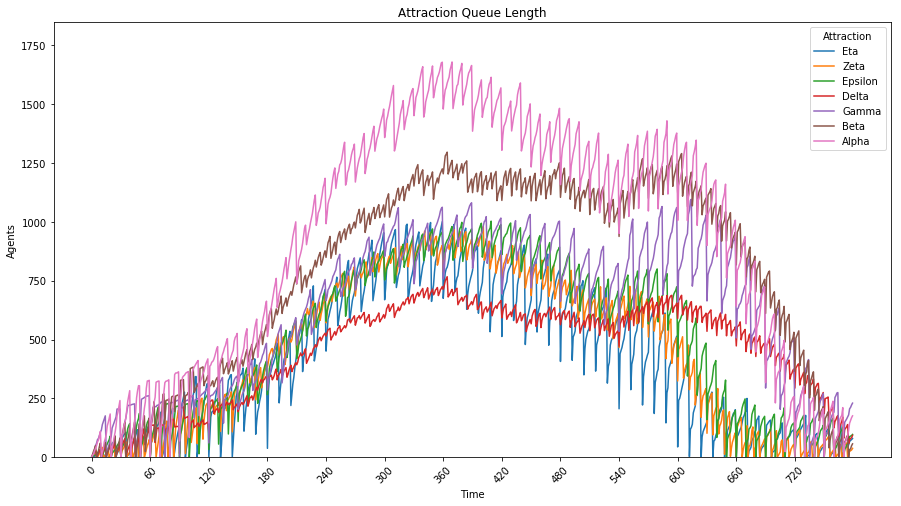

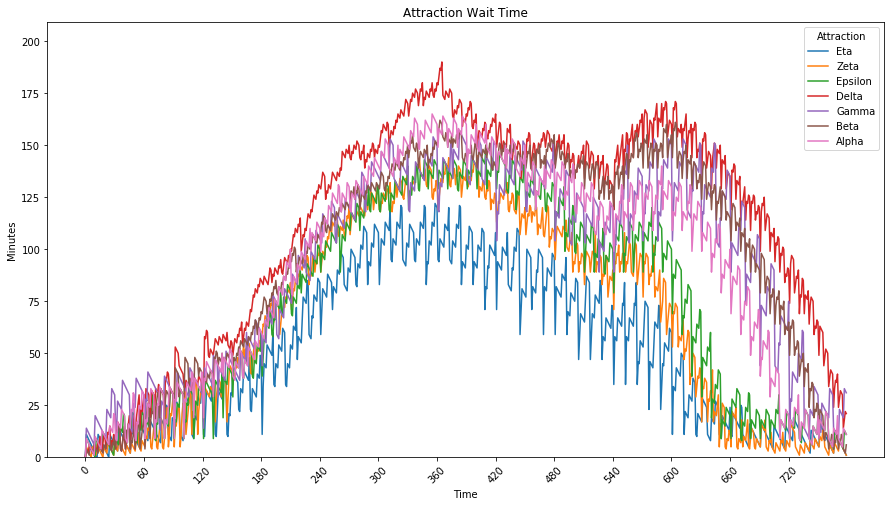

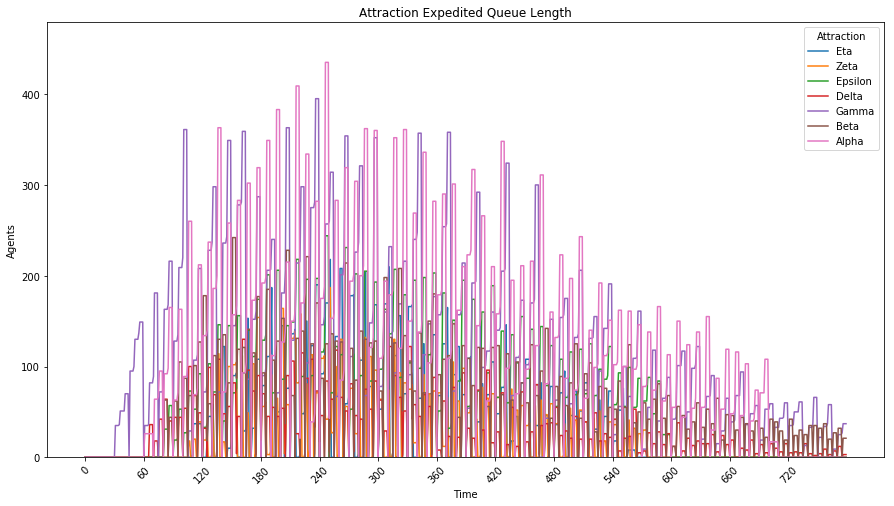

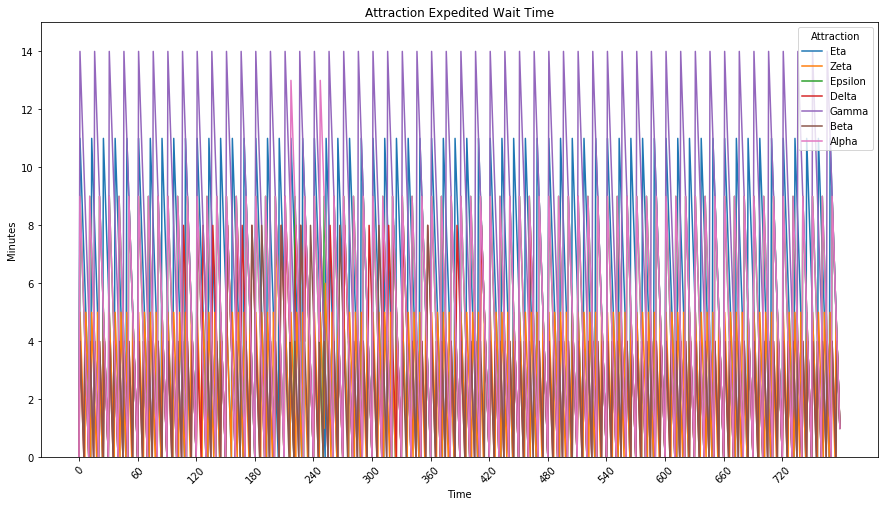

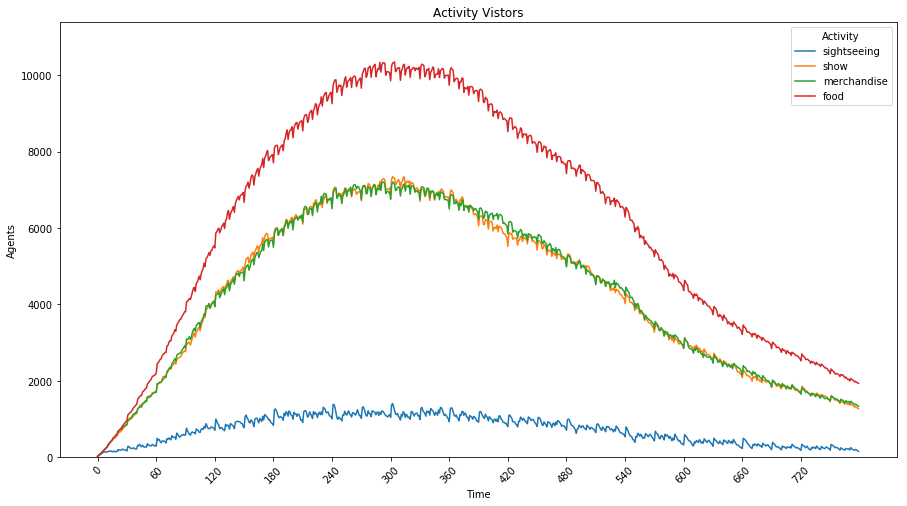

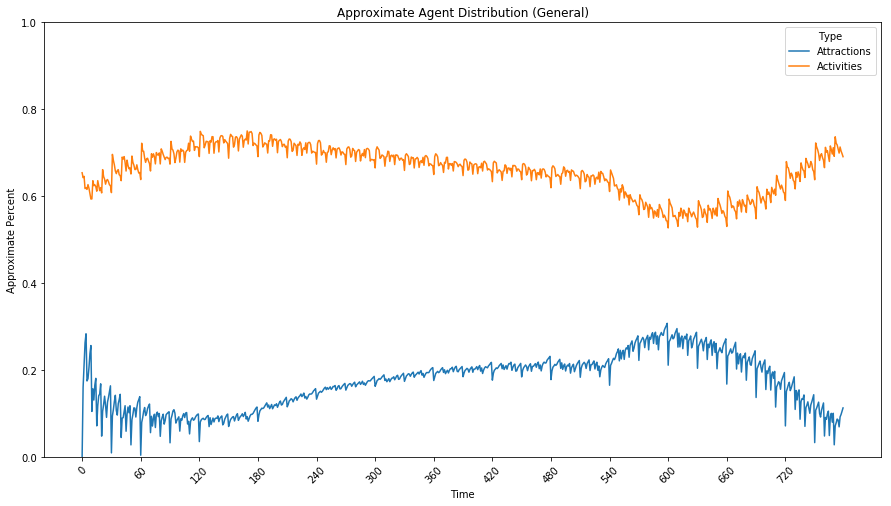

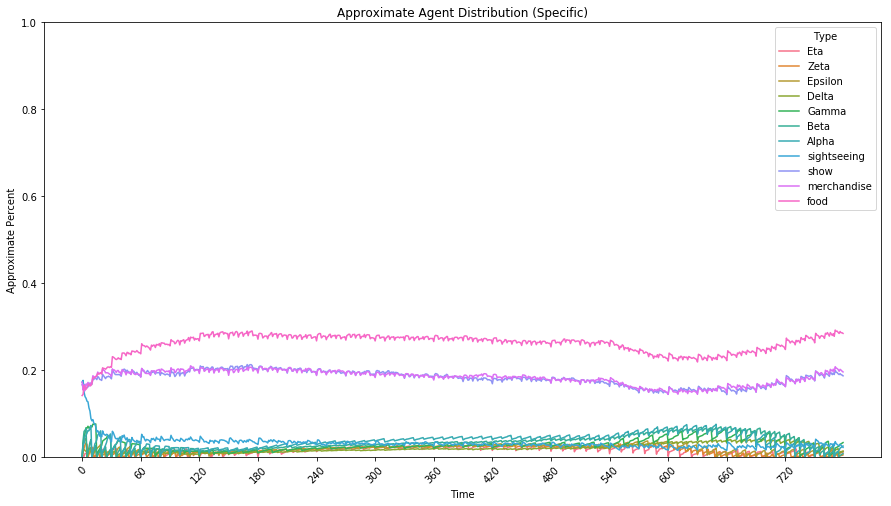

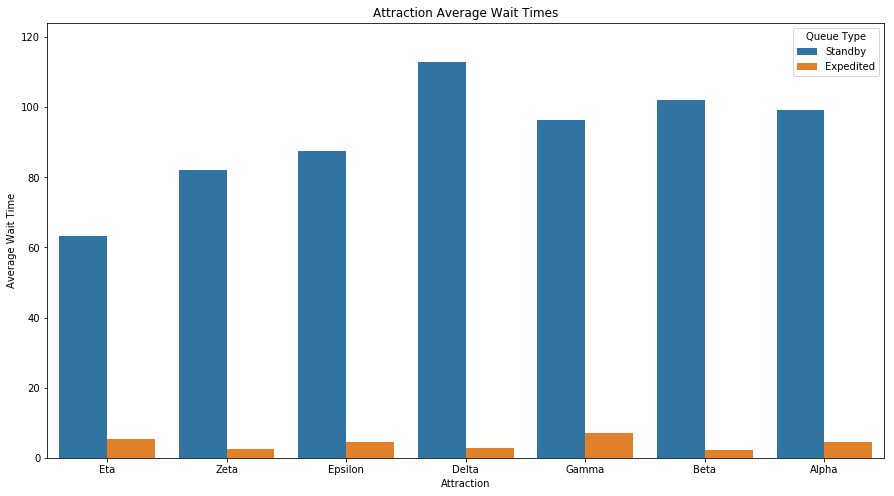

+--------------+---------------------+--------------+
| Attraction   |   Average Wait Time | Queue Type   |
|--------------+---------------------+--------------|
| Eta          |                5.49 | Expedited    |
| Zeta         |                2.54 | Expedited    |
| Epsilon      |                4.49 | Expedited    |
| Delta        |                2.76 | Expedited    |
| Gamma        |                6.99 | Expedited    |
| Beta         |                2.36 | Expedited    |
| Alpha        |                4.63 | Expedited    |
| Eta          |               63.11 | Standby      |
| Zeta         |               82.15 | Standby      |
| Epsilon      |               87.37 | Standby      |
| Delta        |              112.90 | Standby      |
| Gamma        |               96.39 | Standby      |
| Beta         |              102.10 | Standby      |
| Alpha        |               99.27 | Standby      |
+--------------+---------------------+--------------+


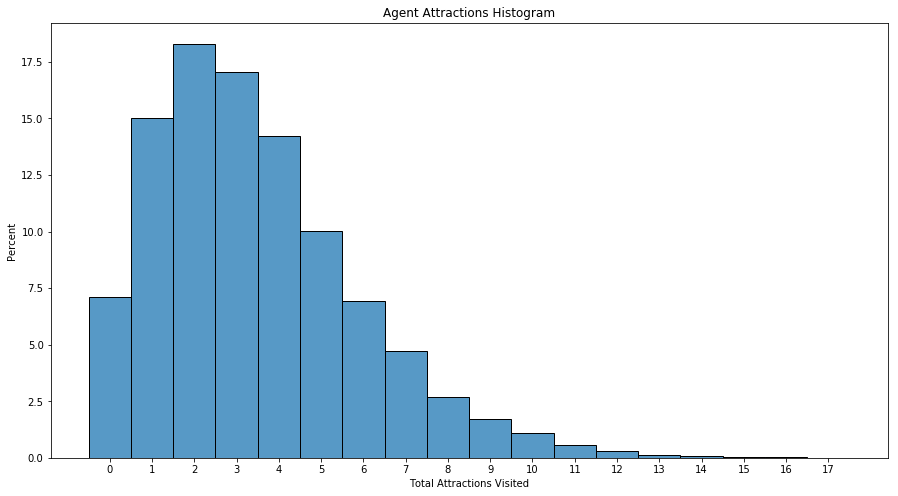

+----------+-----------------------------+
| Metric   |   Total Attractions Visited |
|----------+-----------------------------|
| count    |                    50000.00 |
| mean     |                        3.46 |
| std      |                        2.42 |
| min      |                        0.00 |
| 25%      |                        2.00 |
| 50%      |                        3.00 |
| 75%      |                        5.00 |
| max      |                       17.00 |
+----------+-----------------------------+


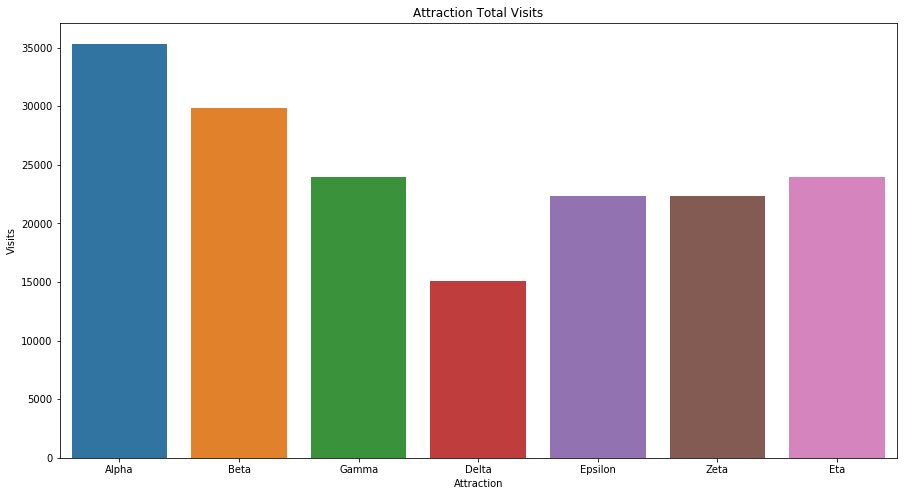

+--------------+----------+
| Attraction   |   Visits |
|--------------+----------|
| Alpha        |    35335 |
| Beta         |    29812 |
| Delta        |    15112 |
| Epsilon      |    22305 |
| Eta          |    23929 |
| Gamma        |    23973 |
| Zeta         |    22311 |
+--------------+----------+


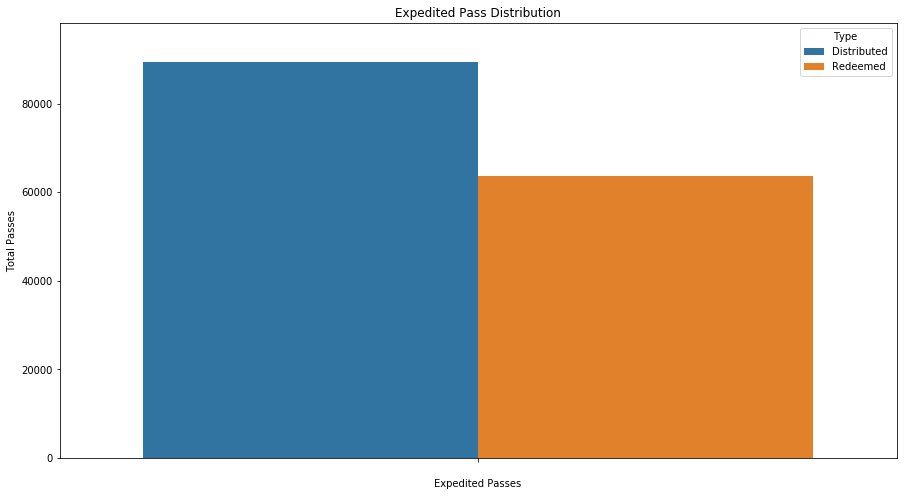

+--------------------+----------------+-------------+
| Expedited Passes   |   Total Passes | Type        |
|--------------------+----------------+-------------|
|                    |          89287 | Distributed |
|                    |          63719 | Redeemed    |
+--------------------+----------------+-------------+


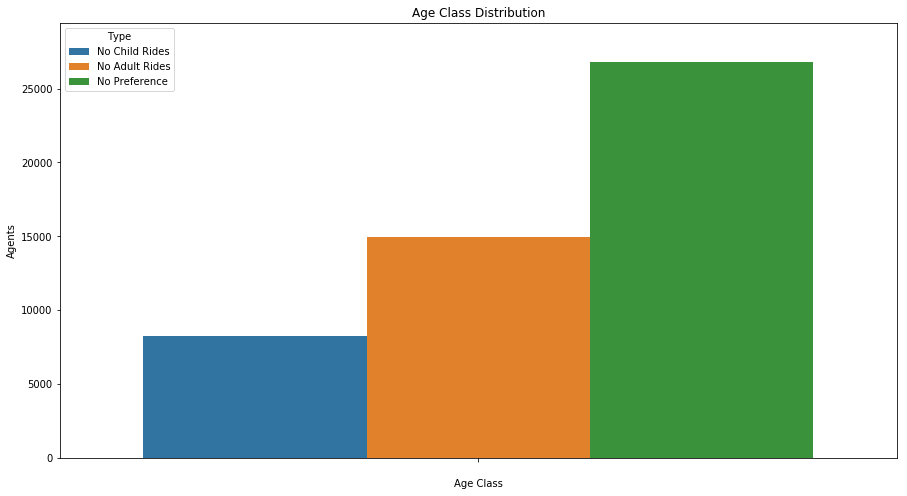

+-------------+----------+----------------+
| Age Class   |   Agents | Type           |
|-------------+----------+----------------|
|             |    14981 | No Adult Rides |
|             |     8247 | No Child Rides |
|             |    26772 | No Preference  |
+-------------+----------+----------------+
Agent ID: 40822
Agent Archetype: park_visitor
Agent arrived at park at time 296. Agent picked up an expedited pass for Beta at time 296. The expedited queue return time is in 169 minutes. Agent visited the activity merchandise at time 297. Agent exited the activity merchandise at time 324. Agent visited the activity food at time 325. Agent exited the activity food at time 366. Agent visited the activity merchandise at time 367. Agent exited the activity merchandise at time 394. Agent visited the activity merchandise at time 395. Agent exited the activity merchandise at time 422. Agent visited the activity food at time 423. Agent exited the activity food at time 464. Agent entered exp

In [8]:
# Initialize Park
RNG_SEED = 5

park = Park(
    attraction_list=ATTRACTIONS,
    activity_list=ACTIVITIES,
    plot_range=PLOT_RANGE,
    random_seed=RNG_SEED,
    version=VERSION,
    verbosity=VERBOSITY
)

# Build Arrivals

park.generate_arrival_schedule(
    arrival_seed=HOURLY_PERCENT, 
    total_daily_agents=TOTAL_DAILY_AGENTS, 
    perfect_arrivals=PERFECT_ARRIVALS,
)

# Build Agents
park.generate_agents(
    behavior_archetype_distribution=AGENT_ARCHETYPE_DISTRIBUTION,
    exp_ability_pct=EXP_ABILITY_PCT,
    exp_wait_threshold=EXP_THRESHOLD,
    exp_limit=EXP_LIMIT
)

# Build Attractions + Activities
park.generate_attractions()
park.generate_activities()

# Pass Time
for _ in range(len(HOURLY_PERCENT.keys()) * 60):
    park.step()

# Save Parameters of Current Run
sim_parameters = {
    "VERSION": VERSION,
    "VERBOSITY": VERBOSITY,
    "SHOW_PLOTS": SHOW_PLOTS,
    "RNG_SEED": RNG_SEED,
    "TOTAL_DAILY_AGENTS": TOTAL_DAILY_AGENTS,
    "PERFECT_ARRIVALS": PERFECT_ARRIVALS,
    "HOURLY_PERCENT": HOURLY_PERCENT,
    "EXP_ABILITY_PCT": EXP_ABILITY_PCT,
    "EXP_THRESHOLD": EXP_THRESHOLD,
    "EXP_LIMIT": EXP_LIMIT,
    "AGENT_ARCHETYPE_DISTRIBUTION": AGENT_ARCHETYPE_DISTRIBUTION,
    "ATTRACTIONS": ATTRACTIONS,
    "ACTIVITIES": ACTIVITIES,
    "BEHAVIOR_ARCHETYPE_PARAMETERS": BEHAVIOR_ARCHETYPE_PARAMETERS,
}
park.write_data_to_file(
    data=sim_parameters, 
    output_file_path=f"{VERSION}/parameters", 
    output_file_format="json"
)

# Store + Print Data
park.make_plots(show=SHOW_PLOTS)
park.print_logs(N = 5)
#park.print_logs(selected_agent_ids = [778])

In [13]:
park.agents[2].log
#park.plot_range = PLOT_RANGE
#park.make_plots(show=SHOW_PLOTS)

'Agent arrived at park at time 0. Agent visited the activity show at time 0. Agent exited the activity show at time 30. Agent entered queue for Alpha at time 31. Agent boarded Alpha at time 40. Agent exited Alpha at time 50. Agent entered queue for Beta at time 51. Agent boarded Beta at time 55. Agent exited Beta at time 60. Agent visited the activity food at time 61. Agent exited the activity food at time 106. Agent picked up an expedited pass for Gamma at time 107. The expedited queue return time is in 38 minutes. Agent entered queue for Delta at time 108. Agent boarded Delta at time 125. Agent exited Delta at time 130. Agent visited the activity food at time 131. Agent exited the activity food at time 145. Agent entered exp queue for Gamma at time 146. Agent boarded Gamma and redeemed their expedited queue pass at time 150. Agent exited Gamma at time 165. Agent picked up an expedited pass for Delta at time 166. The expedited queue return time is in 129 minutes. Agent entered queue f

In [10]:
#import numpy as np
#rng = np.random.default_rng(10+23496)
#mean_time = 45
#rng.normal(mean_time, mean_time/2, 15)
#max((rng.normal(mean_time, mean_time/2, 1))[0], 1)
#park.activities['food'].state["visitor_time_remaining"]

#[
#            (ind, agent_id) for ind, agent_id in enumerate(park.activities['food'].state["visitors"])
#            if park.activities['food'].state["visitor_time_remaining"][ind] == 0
#        ]

park.agents[11748].log

'Agent arrived at park at time 74. Agent visited the activity food at time 74. Agent exited the activity food at time 110. Agent visited the activity show at time 111. Agent exited the activity show at time 135. Agent picked up an expedited pass for Beta at time 136. The expedited queue return time is in 39 minutes. Agent visited the activity sightseeing at time 137. Agent exited the activity sightseeing at time 141. Agent visited the activity sightseeing at time 142. Agent exited the activity sightseeing at time 146. Agent visited the activity merchandise at time 147. Agent exited the activity merchandise at time 171. Agent visited the activity merchandise at time 172. Agent exited the activity merchandise at time 175. Agent entered exp queue for Beta at time 176. Agent boarded Beta and redeemed their expedited queue pass at time 180. Agent exited Beta at time 185. Agent visited the activity show at time 186. Agent exited the activity show at time 210. Agent visited the activity food 

In [11]:
park.attractions['Alpha'].capacity#history["exp_queue_length"]#state["agents_in_attraction"])
# agents_in_attraction, queue, exp_queue, exp_queue_passes_distributed, exp_queue_passes_skipped,
# exp_return_time

# attraction.capacity --> capacity of each cycle, not guests per minute! no wonder.

500.0

In [12]:
a = 17/3
(a + (5 - a % 5))

10.0